# **Convolutional Neural Network**

**1. Load libraries**

In [29]:
#Oscar Daniel Leal Maldonado
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**2. Load Data**

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



11490434/11490434 [==============================] - 0s 0us/step


**3. Preprocessing**

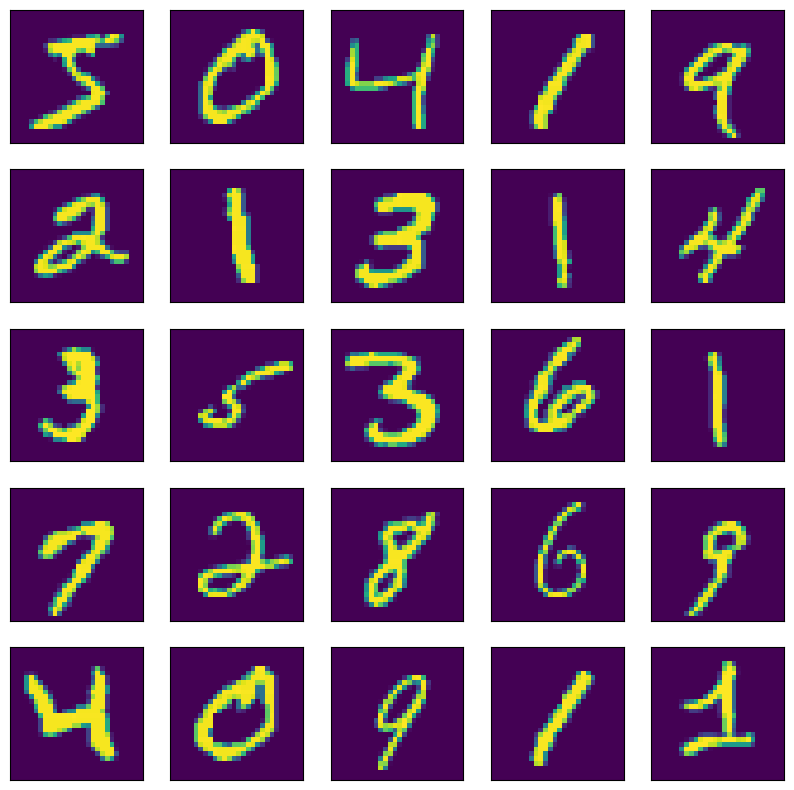

In [23]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,

plt.show()


**4. Model selection and training**

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Activación softmax en la capa de salida
])

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 [==============================] - 56s 32ms/step - loss: 0.1588 - accuracy: 0.9502 - val_loss: 0.0511 - val_accuracy: 0.9848
Epoch 2/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 3/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0366 - val_accuracy: 0.9898
Epoch 4/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 5/10
1688/1688 [==============================] - 48s 29ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0394 - val_accuracy: 0.9898
Epoch 6/10
1688/1688 [==============================] - 49s 29ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0423 - val_accuracy: 0.9888
Epoch 7/10
1688/1688 [==============================] - 48s 28ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0330 - val_accura

**5. Model testing**

In [25]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Realizar 5 predicciones y mostrar los resultados
predictions = model.predict(test_images[:6])
predicted_labels = tf.argmax(predictions, axis=1)


# Mostrar las predicciones y las etiquetas reales con el nombre de las clases
for i in range(6):
    predicted_class = class_names[predicted_labels[i]]
    actual_class = class_names[test_labels[i]]
    print(f"Predicted: {predicted_class}, Actual: {actual_class}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0314 - accuracy: 0.9924
Test accuracy: 0.9923999905586243
1/1 [==============================] - 0s 44ms/step
Predicted: Seven, Actual: Seven
Predicted: Two, Actual: Two
Predicted: One, Actual: One
Predicted: Zero, Actual: Zero
Predicted: Four, Actual: Four
Predicted: One, Actual: One


In [26]:
#Plot
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

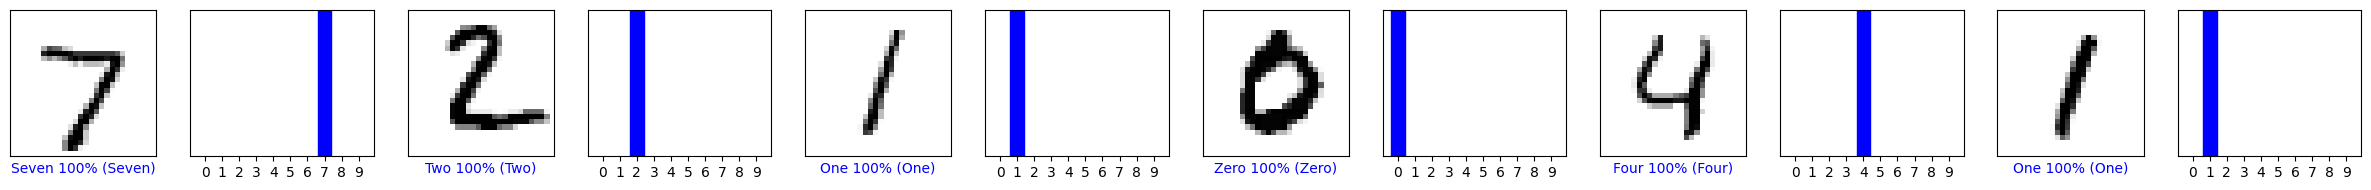

In [30]:
num_rows = 1
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()